Importing Libraries

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
import numpy as np
import pandas as pd
import os
import string
import re

import matplotlib.pyplot as plt

%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from wordcloud import WordCloud
stop_words = stopwords.words('english')

from gensim.models.ldamodel import LdaModel

In [ ]:
import matplotlib.colors as mcolors
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes

Loading Dataset

In [ ]:
dataset=pd.read_csv("Reviews.csv")
print("Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

Dataset has 568454 rows and 10 columns


In [ ]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Sampling** 

In [ ]:
# Taking only 5000 sample due to large number of rows and only one column- Text 
text = dataset.sample(5000).reset_index()['Text']

In [ ]:
text = dataset[['Text']].iloc[:5000].copy()

In [ ]:
text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


# **Preprocessing**

In [ ]:

def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text.lower())
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
text['cleaned_text']=text['Text'].apply(clean_text)

In [ ]:
text.head()

,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned food product fo...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


# **Document-Term matrix**

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=500)
vect_text=vect.fit_transform(text['cleaned_text'])
print(vect.get_feature_names_out())

['able' 'absolutely' 'acid' 'actually' 'added' 'aftertaste' 'allergy'
 'almost' 'along' 'already' 'also' 'alternative' 'although' 'always'
 'amazing' 'amazon' 'amount' 'another' 'anyone' 'anything' 'apple' 'aroma'
 'around' 'arrived' 'artificial' 'available' 'away' 'awesome' 'baby'
 'back' 'bag' 'baked' 'baking' 'bean' 'believe' 'best' 'better' 'biscuit'
 'bisquick' 'bite' 'bitter' 'black' 'blend' 'blue' 'body' 'bottle'
 'bottom' 'bought' 'bowl' 'box' 'brand' 'bread' 'breakfast' 'brew'
 'broken' 'brown' 'butter' 'buying' 'cake' 'calorie' 'came' 'candy'
 'canned' 'care' 'carry' 'case' 'cat' 'cereal' 'change' 'cheap' 'cheaper'
 'cheddar' 'cheese' 'chicken' 'chip' 'chocolate' 'choice' 'christmas'
 'cinnamon' 'clam' 'clean' 'cocoa' 'coconut' 'coffee' 'cold' 'color' 'com'
 'come' 'company' 'compared' 'container' 'content' 'cook' 'cooked'
 'cookie' 'cooking' 'cooky' 'corn' 'cost' 'could' 'count' 'couple'
 'course' 'cracker' 'cream' 'crisp' 'crunch' 'crunchy' 'cup' 'cups'
 'customer' 'dark' '

In [ ]:
vect_text.shape

(5000, 500)

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
print(l)
print(l[0],l[-1])

['like', 'good', 'taste', 'great', 'product', 'flavor', 'love', 'would', 'make', 'really', 'time', 'much', 'amazon', 'best', 'food', 'tried', 'find', 'also', 'little', 'better', 'price', 'chip', 'even', 'well', 'store', 'coffee', 'brand', 'first', 'could', 'made', 'year', 'found', 'bought', 'used', 'recommend', 'free', 'chocolate', 'thing', 'favorite', 'since', 'think', 'delicious', 'order', 'water', 'give', 'know', 'many', 'sweet', 'still', 'pack', 'sugar', 'nice', 'snack', 'without', 'want', 'ever', 'quality', 'review', 'drink', 'every', 'ingredient', 'never', 'work', 'easy', 'something', 'bag', 'regular', 'right', 'ordered', 'come', 'keep', 'need', 'enough', 'salt', 'always', 'using', 'perfect', 'tasty', 'calorie', 'enjoy', 'different', 'le', 'potato', 'take', 'healthy', 'hard', 'small', 'however', 'sure', 'though', 'definitely', 'eating', 'local', 'size', 'thought', 'fresh', 'excellent', 'whole', 'gluten', 'stuff', 'pancake', 'back', 'highly', 'problem', 'family', 'purchase', 'mont

In [ ]:
print(dd['like'])
print(dd['oreo']) 

2.188299435172312
6.0208856099524235


# **LSA**

In [ ]:
#TOPIC MODELLING
lsa_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
lsa_model.explained_variance_ratio_

array([0.00490887, 0.01776598, 0.01608504, 0.01195594, 0.0106832 ,
       0.00956719])

In [ ]:
lsa_model.singular_values_

array([15.57085432,  9.2151734 ,  8.79042543,  7.5624097 ,  7.14510169,
        6.76403638])

In [ ]:
lsa_top.shape

(5000, 6)

In [ ]:
#Topics for document 0:
for i, topic in enumerate(lsa_top[0]):
    print("Topic ", i, " : ", topic*100)

Topic  0  :  28.686801397836675
Topic  1  :  3.173015197709015
Topic  2  :  -21.248825374924944
Topic  3  :  6.078499756034853
Topic  4  :  4.7619928275543755
Topic  5  :  -6.145247980944292


In [ ]:
print(lsa_model.components_.shape) 
print(lsa_model.components_)

(6, 500)
[[ 0.02598891  0.02489808  0.01139465 ...  0.01911111  0.06886009
   0.01771956]
 [ 0.0012609  -0.00549102  0.02181746 ...  0.00173798  0.0077859
  -0.00536287]
 [-0.00926887 -0.00465185  0.01990805 ... -0.01116305 -0.08770367
  -0.00204362]
 [-0.0087907  -0.01059428  0.01262509 ... -0.00979527  0.09146511
  -0.01906757]
 [ 0.00697285  0.00226097  0.01277116 ...  0.05000281  0.02767591
  -0.00579569]
 [-0.01858754 -0.00899092  0.00555357 ... -0.0657689   0.00122519
   0.00701734]]


In [ ]:
vocab = vect.get_feature_names()
topic_content = []
for v in lsa_model.components_:
    sorted_vocab = sorted(zip(vocab, v), key=lambda x : x[1], reverse=True)
    topic_content.append({x:y for x, y in sorted_vocab})
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Top 5 words in topic 1 : ", list(topic_content[0].keys())[:5])
print("Top 5 words in topic 2 : ", list(topic_content[1].keys())[:5])
print("Top 5 words in topic 3 : ", list(topic_content[2].keys())[:5])
print("Top 5 words in topic 4 : ", list(topic_content[3].keys())[:5])
print("Top 5 words in topic 5 : ", list(topic_content[4].keys())[:5])
print("Top 5 words in topic 6 : ", list(topic_content[5].keys())[:5])

Top 5 words in topic 1 :  ['like', 'good', 'taste', 'flavor', 'chip']
Top 5 words in topic 2 :  ['coffee', 'decaf', 'drink', 'taste', 'chocolate']
Top 5 words in topic 3 :  ['coffee', 'chip', 'flavor', 'salt', 'potato']
Top 5 words in topic 4 :  ['food', 'coffee', 'dog', 'newman', 'chip']
Top 5 words in topic 5 :  ['pancake', 'gluten', 'product', 'coffee', 'free']
Top 5 words in topic 6 :  ['like', 'pancake', 'gluten', 'free', 'taste']


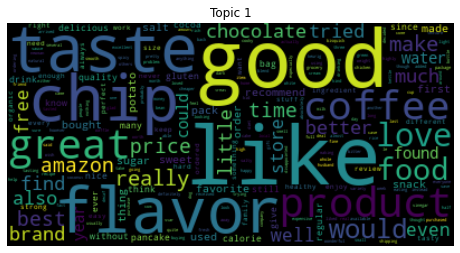

In [ ]:
wc1= WordCloud(background_color="black", max_words=500)
wc1.generate_from_frequencies(topic_content[0])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc1, interpolation="bilinear")
plt.title("Topic 1")
plt.axis("off")
plt.show()

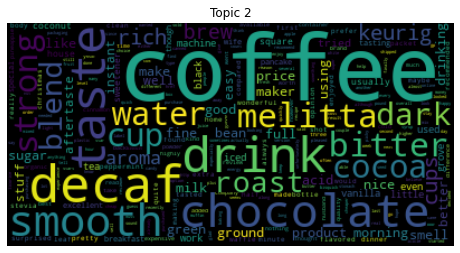

In [ ]:
wc2= WordCloud(background_color="black", max_words=500)
wc2.generate_from_frequencies(topic_content[1])

fig = plt.figure(1, figsize=(8,8))
plt.imshow(wc2, interpolation="bilinear")
plt.title("Topic 2")
plt.axis("off")
plt.show()

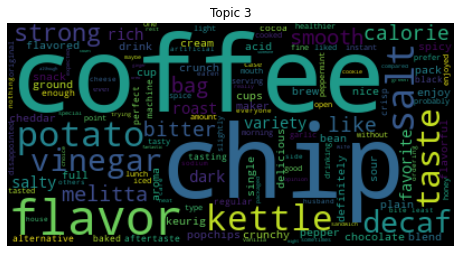

In [ ]:
wc3= WordCloud(background_color="black", max_words=500)
wc3.generate_from_frequencies(topic_content[2])

fig = plt.figure(1, figsize=(8,8))
plt.imshow(wc3, interpolation="bilinear")
plt.title("Topic 3")
plt.axis("off")
plt.show()

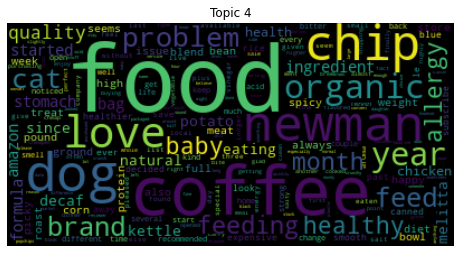

In [ ]:
wc4= WordCloud(background_color="black", max_words=500)
wc4.generate_from_frequencies(topic_content[3])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc4, interpolation="bilinear")
plt.title("Topic 4")
plt.axis("off")
plt.show()

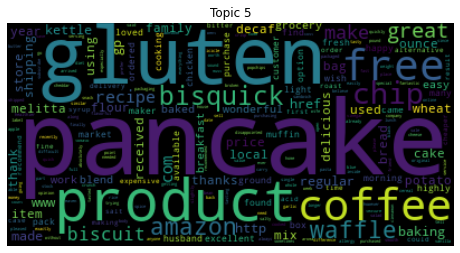

In [ ]:
wc5= WordCloud(background_color="black", max_words=500)
wc5.generate_from_frequencies(topic_content[4])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc5, interpolation="bilinear")
plt.title("Topic 5")
plt.axis("off")
plt.show()

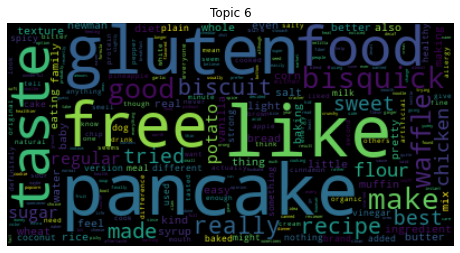

In [ ]:
wc6= WordCloud(background_color="black", max_words=500)
wc6.generate_from_frequencies(topic_content[5])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wc6, interpolation="bilinear")
plt.title("Topic 6")
plt.axis("off")
plt.show()

T-SNE Clustering

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 0.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.035428
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.679131
[t-SNE] KL divergence after 2000 iterations: 1.246641


In [ ]:
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

In [ ]:
from collections import Counter
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_top)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
lsa_keys = get_keys(lsa_top)
n_topics=6
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=500, plot_height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=mycolors[lsa_keys])
    
show(plot)

LDA

In [ ]:
from gensim import corpora, models
import gensim

In [ ]:
splitText = text['cleaned_text'].apply(lambda x:word_tokenize(x))

In [ ]:
#Creating Dictionary and Corpus- Term Document Frequency
dictionary = corpora.Dictionary(splitText)
corpus = [dictionary.doc2bow(t) for t in splitText]

In [ ]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(13, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 1),
  (66, 2),
  (67, 1)],
 [(6, 1),
  (7, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1)],
 [(67, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 

In [ ]:
ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, 
                                    num_topics=6, passes=5, minimum_probability=0)

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=ldamodel, texts=splitText, dictionary=dictionary, coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36909067473006635


In [ ]:
ldamodel.print_topics()

[(0,
  '0.049*"coffee" + 0.013*"." + 0.009*"good" + 0.009*"water" + 0.008*"flavor" + 0.007*"drink" + 0.007*"decaf" + 0.007*"product" + 0.007*"like" + 0.007*"would"'),
 (1,
  '0.029*"chip" + 0.015*"like" + 0.012*"flavor" + 0.011*"salt" + 0.010*"." + 0.010*"taste" + 0.008*"great" + 0.008*"good" + 0.007*"product" + 0.007*"potato"'),
 (2,
  '0.021*"taste" + 0.017*"like" + 0.016*"good" + 0.014*"make" + 0.013*"great" + 0.012*"pancake" + 0.012*"product" + 0.011*"flavor" + 0.009*"really" + 0.009*"love"'),
 (3,
  '0.017*"bisquick" + 0.011*"like" + 0.010*"." + 0.009*"taste" + 0.008*"brand" + 0.007*"good" + 0.007*"flavor" + 0.006*"find" + 0.006*"great" + 0.006*"chip"'),
 (4,
  '0.015*"food" + 0.014*"." + 0.012*"like" + 0.010*"love" + 0.008*"product" + 0.008*"great" + 0.008*"good" + 0.007*"would" + 0.006*"ingredient" + 0.006*"flavor"'),
 (5,
  '0.029*"food" + 0.015*"product" + 0.010*"." + 0.008*"amazon" + 0.008*"year" + 0.007*"love" + 0.007*"dog" + 0.007*"newman" + 0.007*"price" + 0.006*"problem"'

**Displaying Topics in top 20 documents**

In [ ]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(ldamodel, 6)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06
0,coffee,chip,taste,bisquick,food,food
1,.,like,like,like,.,product
2,good,flavor,good,.,like,.
3,water,salt,make,taste,love,amazon
4,flavor,.,great,brand,product,year
5,drink,taste,pancake,good,great,love
6,decaf,great,product,flavor,good,dog
7,product,good,flavor,find,would,newman
8,like,product,really,great,ingredient,price
9,would,potato,love,chip,flavor,problem


**Dominant** **Topic and its Percentage Contribution in each document**

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text['cleaned_text']):
    sent_topics_df2 = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df2 = sent_topics_df2.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df2.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(text['Text'])
    sent_topics_df1 = pd.concat([sent_topics_df2, contents], axis=1)
    return(sent_topics_df2)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=text['Text'])

In [ ]:
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,4.0,0.9635,"food, ., like, love, product, great, good, wou..."
1,2.0,0.6367,"taste, like, good, make, great, pancake, produ..."
2,0.0,0.6890,"coffee, ., good, water, flavor, drink, decaf, ..."
3,2.0,0.5717,"taste, like, good, make, great, pancake, produ..."
4,2.0,0.5312,"taste, like, good, make, great, pancake, produ..."
...,...,...,...
4995,4.0,0.6099,"food, ., like, love, product, great, good, wou..."
4996,2.0,0.9682,"taste, like, good, make, great, pancake, produ..."
4997,2.0,0.7257,"taste, like, good, make, great, pancake, produ..."
4998,2.0,0.8419,"taste, like, good, make, great, pancake, produ..."


In [ ]:
contents = pd.Series(text['Text'])
df_topic_sents_keywords = pd.concat([df_topic_sents_keywords, contents], axis=1)

In [ ]:
df_topic_sents_keywords 

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,4.0,0.9635,"food, ., like, love, product, great, good, wou...",I have bought several of the Vitality canned d...
1,2.0,0.6367,"taste, like, good, make, great, pancake, produ...",Product arrived labeled as Jumbo Salted Peanut...
2,0.0,0.6890,"coffee, ., good, water, flavor, drink, decaf, ...",This is a confection that has been around a fe...
3,2.0,0.5717,"taste, like, good, make, great, pancake, produ...",If you are looking for the secret ingredient i...
4,2.0,0.5312,"taste, like, good, make, great, pancake, produ...",Great taffy at a great price. There was a wid...
...,...,...,...,...
4995,4.0,0.6099,"food, ., like, love, product, great, good, wou...",I really wanted to like these.<br /><br />Firs...
4996,2.0,0.9682,"taste, like, good, make, great, pancake, produ...",I was not impressed with these cookies when I ...
4997,2.0,0.7257,"taste, like, good, make, great, pancake, produ...",The cookies came sealed and seem to be high qu...
4998,2.0,0.8419,"taste, like, good, make, great, pancake, produ...","These taste very good, but aren't like the BES..."


In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9635,"food, ., like, love, product, great, good, wou...",I have bought several of the Vitality canned d...
1,1,2.0,0.6367,"taste, like, good, make, great, pancake, produ...",Product arrived labeled as Jumbo Salted Peanut...
2,2,0.0,0.6890,"coffee, ., good, water, flavor, drink, decaf, ...",This is a confection that has been around a fe...
3,3,2.0,0.5717,"taste, like, good, make, great, pancake, produ...",If you are looking for the secret ingredient i...
4,4,2.0,0.5312,"taste, like, good, make, great, pancake, produ...",Great taffy at a great price. There was a wid...
5,5,4.0,0.3517,"food, ., like, love, product, great, good, wou...",I got a wild hair for taffy and ordered this f...
6,6,1.0,0.6925,"chip, like, flavor, salt, ., taste, great, goo...",This saltwater taffy had great flavors and was...
7,7,2.0,0.6976,"taste, like, good, make, great, pancake, produ...",This taffy is so good. It is very soft and ch...
8,8,5.0,0.9164,"food, product, ., amazon, year, love, dog, new...",Right now I'm mostly just sprouting this so my...
9,9,5.0,0.9400,"food, product, ., amazon, year, love, dog, new...",This is a very healthy dog food. Good for thei...


**Displaying most representative sentence for each topic**

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9943,"coffee, ., good, water, flavor, drink, decaf, product, like, would","When we received our Keurig Elite for Christmas, we were so excited to break open the sample pac..."
1,1.0,0.9932,"chip, like, flavor, salt, ., taste, great, good, product, potato",Bought Uncle Ray's Wavy's 16 oz potato chips because purchased Uncle Ray's 16 oz barbque potato...
2,2.0,0.9886,"taste, like, good, make, great, pancake, product, flavor, really, love","I actually use this mix to make vegetable biryani and it works well for this purpose, with some..."
3,3.0,0.9847,"bisquick, like, ., taste, brand, good, flavor, find, great, chip","If you're looking at Choice tea, you're probably already aware that this extraordinary company w..."
4,4.0,0.9939,"food, ., like, love, product, great, good, would, ingredient, flavor","It's no secret that high fructose corn syrup is detrimental to your health. Unfortunately, it's ..."
5,5.0,0.9970,"food, product, ., amazon, year, love, dog, newman, price, problem","If your child is truly lactose intolerant, this product is great. If fussiness/gas is an issue,..."


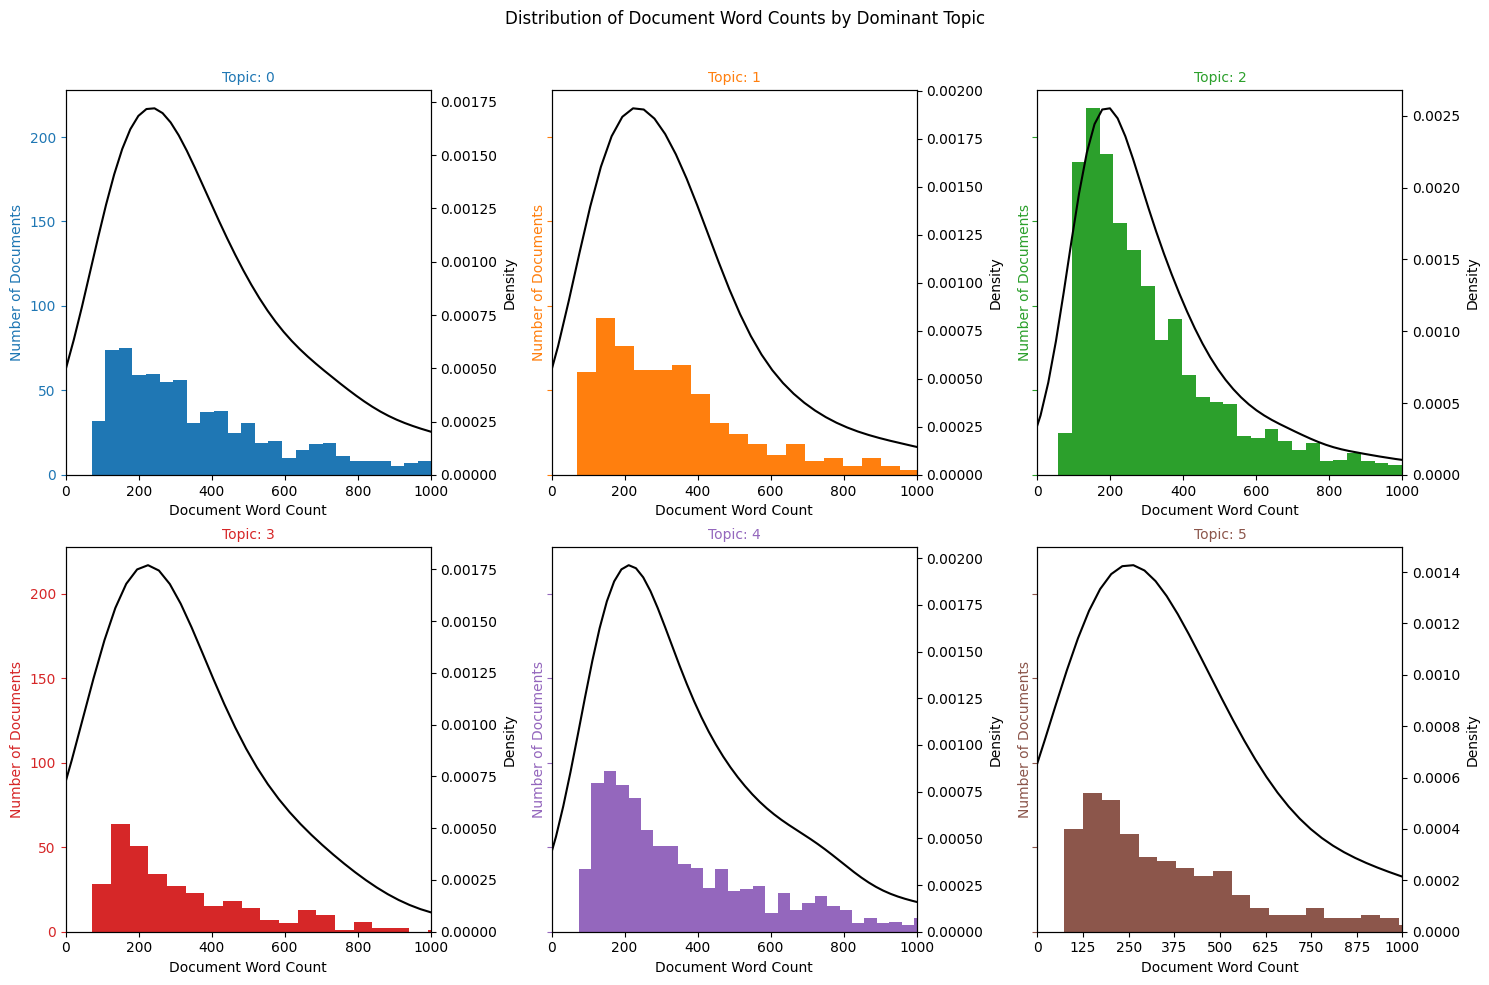

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,3,figsize=(15,10), dpi=100, sharex=False, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=10, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=12)
plt.show() 

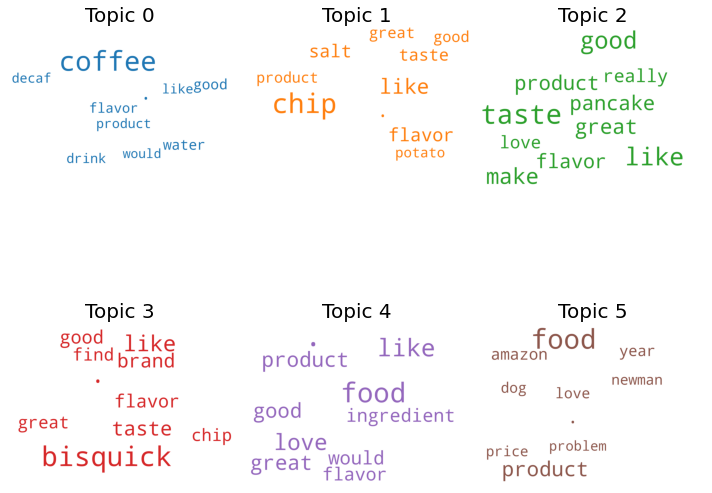

In [ ]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Refactoring results of LDA into numpy matrix 

In [ ]:
hm = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])


And reduce dimensionality using t-SNE algorithm:

In [ ]:

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(hm)

topic_num = np.argmax(hm, axis=1)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=500, plot_height=500)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.002938


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.020164
[t-SNE] KL divergence after 1000 iterations: 0.644259


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8c06a93612b594d496dca25e50f3f43c002f6aeb9faddf6cb6f2dc6628f365a7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = pyLDAvis.gensim_models.prepare(ldamodel,corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.063924  0.039326       1        1  26.296022
4     -0.051018 -0.012508       2        1  20.599047
0      0.044712  0.127739       3        1  17.349629
5     -0.183836  0.012265       4        1  14.917808
1      0.028696 -0.140352       5        1  12.500572
3      0.097522 -0.026470       6        1   8.336923, topic_info=          Term         Freq        Total Category  logprob  loglift
401     coffee  1563.000000  1563.000000  Default  30.0000  30.0000
5         food  1238.000000  1238.000000  Default  29.0000  29.0000
1795      chip   698.000000   698.000000  Default  28.0000  28.0000
5211  bisquick   360.000000   360.000000  Default  27.0000  27.0000
2871   pancake   581.000000   581.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
731       used    53.163824   474.738460   Topic6  -5.5599   0.2951
2871   pancake    54.289675   581.588656   Topic6  -5.5389   0.1130
180       make    59.412564  1026.792522   Topic6  -5.4487  -0.3652
349      still    46.304984   352.696472   Topic6  -5.6980   0.4541
802      drink    43.318538   345.145369   Topic6  -5.7647   0.4091

[498 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
155       1  0.185691     .
155       2  0.273769     .
155       3  0.210936     .
155       4  0.132396     .
155       5  0.117810     .
...     ...       ...   ...
238       2  0.229565  year
238       3  0.124621  year
238       4  0.419776  year
238       5  0.010932  year
238       6  0.072149  year

[1054 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 6, 2, 4])

# **NMF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

In [ ]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(vect_text);

In [ ]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [ ]:
#obtain a NMF model.
model = NMF(n_components=6, init='nndsvd');

In [ ]:
#fit the model
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=6)

In [ ]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vect.get_feature_names()
    
    word_dict = {};
    for i in range(6):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-10 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [ ]:
get_nmf_topics(model, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06
0,food,coffee,chip,popcorn,chocolate,pancake
1,product,strong,salt,white,cocoa,gluten
2,love,decaf,potato,small,cup,waffle
3,great,smooth,vinegar,corn,dark,free
4,good,bitter,kettle,ever,keurig,bisquick
5,price,roast,calorie,baby,milk,biscuit
6,sauce,melitta,snack,order,cups,recipe
7,would,taste,flavor,best,best,make
8,store,blend,bag,bag,grove,wonderful
9,find,flavor,salty,delicious,square,made
